In [1]:
#Assignments for coursera course: Advanced Portoflio Construction and Analysis with Python
import edhec_risk_kit_207 as erk
import numpy as np
import pandas as pd

In [4]:
rets = erk.get_ind_returns(weighting="vw", n_inds=49)["1991":]

In [6]:
fff = erk.get_fff_returns()["1991":]

In [24]:
import statsmodels.api as sm
beer_excess = rets.loc["2013":, ['Steel']] - fff.loc["2013":, ['RF']].values
mkt_excess = fff.loc["2013":,['Mkt-RF']]
exp_var = mkt_excess.copy()
exp_var["Constant"] = 1
lm = sm.OLS(beer_excess, exp_var).fit()

In [25]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Steel   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     62.18
Date:                Sat, 25 Dec 2021   Prob (F-statistic):           2.97e-11
Time:                        19:20:35   Log-Likelihood:                 116.15
No. Observations:                  72   AIC:                            -228.3
Df Residuals:                      70   BIC:                            -223.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         1.4169      0.180      7.885      0.000       1.059       1.775
Constant      -0.0098      0.006     -1.627      0.108      -0.022       0.002
==============================================================================
Omnibus:                        7.128   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                6.420
Skew:                           0.635   Prob(JB):                       0.0403
Kurtosis:                       3.727   Cond. No.                         31.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
fff

,Mkt-RF,SMB,HML,RF
1991-01,0.0469,0.0379,-0.0184,0.0052
1991-02,0.0719,0.0395,-0.0054,0.0048
1991-03,0.0265,0.0389,-0.0123,0.0044
1991-04,-0.0028,0.0050,0.0142,0.0053
1991-05,0.0365,-0.0034,-0.0057,0.0047
...,...,...,...,...
2018-08,0.0344,0.0123,-0.0412,0.0016
2018-09,0.0006,-0.0237,-0.0134,0.0015
2018-10,-0.0768,-0.0468,0.0341,0.0019
2018-11,0.0169,-0.0074,0.0020,0.0018


In [58]:
d = {}
for i in rets.columns:
    ind_excess = rets.loc[:, [i]] - fff.loc[:, ['RF']].values
    mkt_excess = fff.loc[:,['Mkt-RF', 'SMB', 'HML']]
    result = erk.regress(ind_excess, mkt_excess)
    beta = result.params['SMB']
    d[i] = beta
    
df = pd.Series(d)

In [59]:
df.sort_values()

Beer    -0.358655
Drugs   -0.319486
Smoke   -0.307794
Food    -0.267873
Insur   -0.251649
Telcm   -0.194233
Banks   -0.188034
Util    -0.176927
Hshld   -0.171127
Aero    -0.141608
Soda    -0.121587
Meals   -0.094673
Rtail   -0.041055
Paper   -0.029786
Chems   -0.024151
ElcEq   -0.024050
Other   -0.019304
Oil     -0.015416
Guns    -0.007007
Boxes   -0.000577
Trans    0.031009
Clths    0.057455
Softw    0.066100
Fin      0.121906
MedEq    0.125676
Books    0.137026
Agric    0.165856
Ships    0.167156
BldMt    0.195020
Hardw    0.197752
BusSv    0.200393
Autos    0.206325
Hlth     0.234674
Whlsl    0.265499
Mines    0.267865
PerSv    0.273150
Fun      0.281732
Gold     0.289094
Chips    0.319935
Toys     0.329862
Mach     0.353644
Cnstr    0.408917
Rubbr    0.448314
LabEq    0.465178
Steel    0.493311
Coal     0.534373
Txtls    0.535961
RlEst    0.687456
FabPr    0.688508
dtype: float64

In [ ]:
# Assignment 2

In [64]:
rets = erk.get_ind_returns(weighting="vw", n_inds=30)["1997":]
ind_mcap = erk.get_ind_market_caps(30, weights=True)["1997":]

In [63]:
ewr = erk.backtest_ws(rets, estimation_window=36, weighting=erk.weight_ew)

In [76]:
tethered_ewr = erk.backtest_ws(rets, estimation_window=36, weighting=erk.weight_ew, cap_weights=ind_mcap, max_cw_mult=2, microcap_threshold=0.01)

In [66]:
cwr = erk.backtest_ws(rets, estimation_window=36, weighting=erk.weight_cw, cap_weights=ind_mcap)

In [80]:
mv_s_r = erk.backtest_ws(rets, estimation_window=36, weighting=erk.weight_gmv, cov_estimator=erk.sample_cov)

In [84]:
mv_sh_r = erk.backtest_ws(rets, estimation_window=36, weighting=erk.weight_gmv, cov_estimator=erk.shrinkage_cov, delta=0.25)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.077614,0.158685,-0.538531,5.317042,0.072485,0.106220,0.291838,-0.532980
CW,0.065196,0.151478,-0.556621,4.249894,0.071076,0.098531,0.225949,-0.518990
Tethered,0.076838,0.140774,-0.649872,4.664374,0.065482,0.093766,0.323653,-0.487413
GMV,0.066305,0.117410,-0.741086,4.469204,0.055456,0.080583,0.300812,-0.421289
Shrinkage GMV,0.068466,0.114572,-0.731286,4.264934,0.053884,0.077715,0.326626,-0.393410


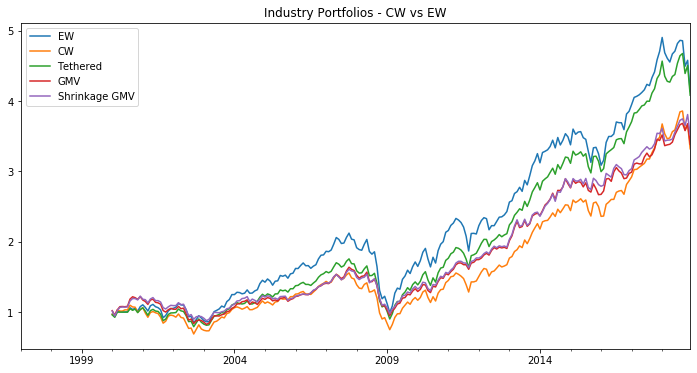

In [85]:
btr = pd.DataFrame({"EW": ewr, "CW": cwr, "Tethered": tethered_ewr, "GMV": mv_s_r, "Shrinkage GMV": mv_sh_r})
(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios - CW vs EW")
erk.summary_stats(btr.dropna())

In [82]:
erk.tracking_error(ewr, cwr),erk.tracking_error(tethered_ewr, cwr)

(0.18752094143646486, 0.11671015519949166)

In [ ]:
# Assignment 3

In [76]:
ind = ['Hlth', 'Fin', 'Whlsl', 'Rtail', 'Food']
rets = erk.get_ind_returns(weighting="vw", n_inds=49)["2013":][ind]
mcap = erk.get_ind_market_caps(49, weights=True)["2013":][ind]

In [102]:
w_eq = erk.weight_cw(rets, mcap)

In [103]:
w_eq

Hlth     0.042624
Fin      0.184533
Whlsl    0.096043
Rtail    0.537344
Food     0.139456
Name: 2013-02, dtype: float64

In [104]:
vol = erk.annualize_vol(rets, 12)

rho = rets.corr()

sigma = vol.dot(vol.T)*rho

In [105]:
implied_rets = erk.implied_returns(delta=2.5, sigma=sigma, w=w_eq)

In [106]:
implied_rets

Hlth     0.152854
Fin      0.176483
Whlsl    0.201786
Rtail    0.223770
Food     0.157528
Name: Implied Returns, dtype: float64

In [121]:
q = pd.Series([.03]) # just one view
# start with a single view, all zeros and overwrite the specific view
p = pd.DataFrame([0.]*len(ind), index=ind).T
# find the relative market caps of FR and UK to split the
# relative outperformance of DE ...
w_rtail =  w_eq.loc["Rtail"]/(w_eq.loc["Rtail"]+w_eq.loc["Whlsl"])
w_whlsl =  w_eq.loc["Whlsl"]/(w_eq.loc["Rtail"]+w_eq.loc["Whlsl"])
p.iloc[0]['Hlth'] = 1.
p.iloc[0]['Rtail'] = -w_rtail
p.iloc[0]['Whlsl'] = -w_whlsl

In [122]:
p

,Hlth,Fin,Whlsl,Rtail,Food
0,1.0,0.0,-0.151635,-0.848365,0.0


In [123]:
bl_mu, bl_sigma = erk.bl(w_eq, sigma, p, q, tau = 0.05)

In [124]:
bl_mu

Hlth     0.179360
Fin      0.170206
Whlsl    0.193356
Rtail    0.199007
Food     0.144841
dtype: float64

In [125]:
erk.w_msr(bl_sigma, bl_mu)

Hlth     0.275883
Fin      0.184533
Whlsl    0.060673
Rtail    0.339455
Food     0.139456
dtype: float64

In [ ]:
# Assignment 4

In [126]:
rets = erk.get_ind_returns(weighting="vw", n_inds=49)["2014":]
mcap = erk.get_ind_market_caps(49, weights=True)["2014":]

In [131]:
cov = rets.cov()
erk.risk_contribution(mcap.iloc[0,:], cov).sort_values(ascending=False)

Banks    0.104060
Softw    0.093745
Oil      0.088914
Drugs    0.084653
Rtail    0.070120
Chips    0.063869
Telcm    0.046113
Other    0.042484
Insur    0.039418
Mach     0.030455
Fin      0.028291
Trans    0.026039
Chems    0.025071
BusSv    0.021816
Hardw    0.018487
Autos    0.016170
Aero     0.014904
LabEq    0.014527
Whlsl    0.013434
MedEq    0.012792
Hshld    0.011568
Paper    0.011139
Meals    0.010572
Food     0.010084
Util     0.009626
Fun      0.009335
ElcEq    0.007693
Cnstr    0.007428
Clths    0.006676
Smoke    0.006470
Soda     0.006309
BldMt    0.006061
Steel    0.005182
Mines    0.004954
Beer     0.004776
Hlth     0.004203
PerSv    0.003219
Agric    0.002886
RlEst    0.002803
Boxes    0.002595
Guns     0.002263
Rubbr    0.001972
Toys     0.001796
Ships    0.001276
Txtls    0.001276
Books    0.001203
Coal     0.000870
FabPr    0.000309
Gold     0.000096
dtype: float64

In [134]:
erk.risk_contribution(erk.weight_ew(rets), cov).sort_values(ascending=False)

Steel    0.030938
Ships    0.030005
Coal     0.029025
Mines    0.028641
BldMt    0.028106
Mach     0.027558
FabPr    0.027473
RlEst    0.026693
Txtls    0.026679
ElcEq    0.026376
Chems    0.026042
Boxes    0.025176
Books    0.024772
Cnstr    0.024585
Oil      0.023372
Toys     0.023371
Autos    0.023338
Trans    0.022935
Fin      0.022416
Fun      0.022200
Banks    0.021622
Rubbr    0.021541
LabEq    0.021497
Aero     0.021306
Paper    0.021104
Whlsl    0.020881
BusSv    0.020757
Hardw    0.020570
Chips    0.020140
PerSv    0.019258
Drugs    0.019058
Rtail    0.019039
Insur    0.018249
MedEq    0.017747
Softw    0.017357
Hlth     0.017251
Agric    0.016982
Guns     0.015950
Other    0.015948
Telcm    0.015910
Meals    0.013261
Clths    0.012855
Gold     0.012449
Soda     0.012041
Food     0.011227
Beer     0.010500
Hshld    0.010492
Smoke    0.009393
Util     0.005916
dtype: float64

In [142]:
pd.Series(erk.weight_erc(rets), index=rets.columns).sort_values(ascending=False)

Util     0.052156
Hshld    0.033184
Smoke    0.032606
Beer     0.032028
Food     0.030251
Clths    0.029129
Soda     0.028233
Meals    0.027907
Gold     0.027282
Guns     0.023809
Other    0.023423
Telcm    0.023133
Agric    0.022479
Hlth     0.022246
Softw    0.021963
Insur    0.020970
MedEq    0.020907
PerSv    0.019924
Drugs    0.019730
Rtail    0.019567
Chips    0.018878
Hardw    0.018654
BusSv    0.018456
Banks    0.018445
Whlsl    0.018421
Aero     0.017984
Fin      0.017833
Paper    0.017761
LabEq    0.017751
Rubbr    0.017747
Fun      0.017663
Oil      0.016764
Trans    0.016763
Autos    0.016726
Toys     0.016271
Cnstr    0.015924
Books    0.015425
Boxes    0.015247
FabPr    0.015183
Chems    0.014918
Coal     0.014759
ElcEq    0.014747
Txtls    0.014440
RlEst    0.014429
Mach     0.014292
Mines    0.013951
BldMt    0.013790
Ships    0.013041
Steel    0.012809
dtype: float64

In [143]:
erk.risk_contribution(erk.weight_ew(rets), cov).max()-erk.risk_contribution(erk.weight_ew(rets), cov).min()

0.02502175762491148

In [144]:
cov = rets.cov()
erk.risk_contribution(mcap.iloc[0,:], cov).max()-erk.risk_contribution(mcap.iloc[0,:], cov).min()

0.1039644943981684